In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn

print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)

# Use relative path since the notebook is in the same folder as the data
path = 'data_banknote_authentication.txt'
cols = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']
df = pd.read_csv(path, header=None, names=cols)

print("Shape:", df.shape)
print(df.head())
print("Class distribution:\n", df['class'].value_counts())

Python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
pandas: 3.0.0
numpy: 2.4.1
scikit-learn: 1.8.0
Shape: (1372, 5)
   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Class distribution:
 class
0    762
1    610
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target labels (y)
X = df[['variance', 'skewness', 'kurtosis', 'entropy']].values
y = df['class'].values

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Training set class distribution:", np.bincount(y_train))
print("Test set class distribution:", np.bincount(y_test))

Training set size: 1097
Test set size: 275
Training set class distribution: [614 483]
Test set class distribution: [148 127]


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling applied.")

Feature scaling applied.


KNN Classifier accuracy: 1.0
Accuracy: 1.0


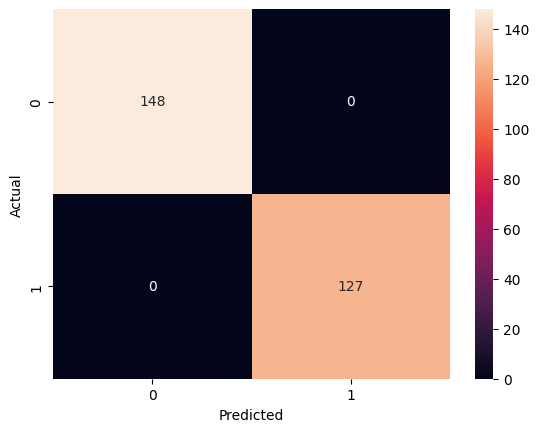

ROC-AUC: 1.0


In [4]:
#KNN CLASSIFIER CODE
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classifier accuracy:", np.mean(y_pred_knn == y_test))

# print(X_train_scaled)
# print(X_test_scaled)


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# %pip install seaborn matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_knn)
print("ROC-AUC:", auc)





SVM Classifier accuracy: 0.9854545454545455
SVM Train Accuracy: 0.9881494986326345
SVM Test Accuracy: 0.9854545454545455
Accuracy Gap (train - test): 0.002694953178088988


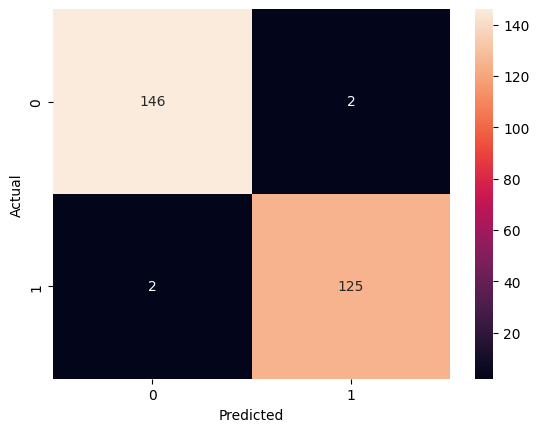

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

ROC-AUC (decision scores): 0.9994679719089168


In [5]:
#SVM CLASSIFIER CODE
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Classifier accuracy:", np.mean(y_pred_svm == y_test))

# Accuracy metrics and diagnostics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train vs Test accuracy to check overfitting
train_accuracy = accuracy_score(y_train, svm.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Train Accuracy:", train_accuracy)
print("SVM Test Accuracy:", test_accuracy)
print("Accuracy Gap (train - test):", train_accuracy - test_accuracy)

# Confusion matrix + heatmap
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_svm))

# ROC-AUC using decision scores (preferred)
scores = svm.decision_function(X_test_scaled)
auc = roc_auc_score(y_test, scores)
print("ROC-AUC (decision scores):", auc)
